<a href="https://colab.research.google.com/github/ai-with-avi/PRODIGY_GA_05/blob/main/Neural_style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow_hub matplotlib

In [5]:
from google.colab import files
from PIL import Image

# Upload content and style images
uploaded = files.upload()

# Load the content and style images from your uploads
content_image = Image.open("content image.jpeg")
style_image = Image.open("style image.jpg")


Saving style image.jpg to style image (1).jpg
Saving content image.jpeg to content image (3).jpeg


In [6]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

# Define function to load and process the image
def load_image(image, max_dim=512):
    img = np.array(image)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (max_dim, max_dim), preserve_aspect_ratio=True)
    img = img[tf.newaxis, :]
    return img

content_image_tensor = load_image(content_image)
style_image_tensor = load_image(style_image)


In [7]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [8]:
# Perform style transfer
stylized_image = hub_module(content_image_tensor, style_image_tensor)[0]

# Convert the stylized image tensor to an image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    return Image.fromarray(tensor)

stylized_image = tensor_to_image(stylized_image)


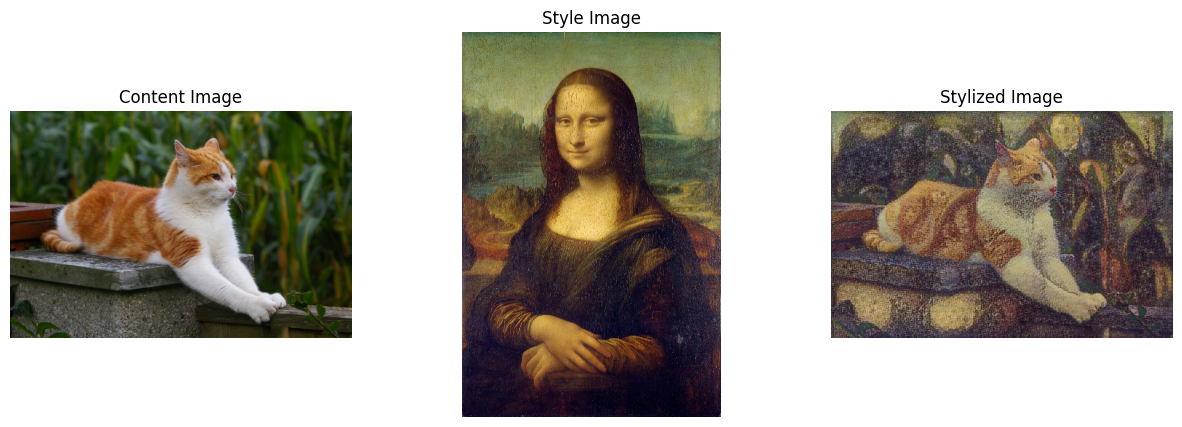

In [9]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(content, style, stylized):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(content)
    axes[0].set_title("Content Image")
    axes[1].imshow(style)
    axes[1].set_title("Style Image")
    axes[2].imshow(stylized)
    axes[2].set_title("Stylized Image")
    for ax in axes:
        ax.axis('off')
    plt.show()

# Display the images
display_images(content_image, style_image, stylized_image)

# Save the stylized image
stylized_image.save("stylized_image.jpg")
